<a href="https://colab.research.google.com/github/jillginger/leetgingercode/blob/master/jing_jiang_coding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jing Jiang Coding Challenge 



---
Produced in Google Colab

2020-08-15


# Question 1

In [ ]:
#Import Packages
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## Data Cleaning and EDA

In [ ]:
#Load Dataset
xlsx = pd.ExcelFile('/content/online_retail_II.xlsx')
df1 = pd.read_excel(xlsx, 0) #Year 2009-2010

df1.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [ ]:
#Get an idea of how large the dataset is, and what the variables/features look like

print(df1.shape) #dataset shape
print(df1.info()) #general info
df1.describe() #numeric info

(525461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


From the descriptive stats of numeric features above, we can see negative quantity and price. I first assume those observations are returns recorded as negative sales. 


In [ ]:
#count the number of attributes having negative quantity
sum(df1['Quantity'] < 0 )
df_temp = df1[df1['Quantity'] <0]
df_temp.sort_values(by = ['Quantity'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
303996,519017,22759,NaN,-9600,2010-08-13 09:14:00,0.00,NaN,United Kingdom
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
156488,504311,22197,NaN,-9200,2010-04-12 14:39:00,0.00,NaN,United Kingdom
428975,530348,16235,?,-9000,2010-11-02 15:48:00,0.00,NaN,United Kingdom
194372,507913,10120,Zebra invcing error,-9000,2010-05-11 17:16:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
271988,C515790,15036,ASSORTED COLOURS SILK FAN,-1,2010-07-14 15:53:00,0.75,16180.0,United Kingdom
271986,C515790,20828,GLITTER BUTTERFLY CLIPS,-1,2010-07-14 15:53:00,2.55,16180.0,United Kingdom
64590,C495170,21545,CERAMIC BIRDHOUSE BUTTERFLY SMALL,-1,2010-01-21 12:45:00,2.95,13148.0,United Kingdom
271982,C515787,22502,PICNIC BASKET WICKER SMALL,-1,2010-07-14 15:46:00,4.25,14621.0,United Kingdom


It seems that some negative quantities represent errors. I cannot wildly assume that some certain transactions are errors while the others are returns, so I exclude all attirbutes with negative quantities from the future analyses.

In [ ]:
df_temp = df1[df1['Quantity'] <0]
df_temp.sort_values(by = ['Quantity'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
303996,519017,22759,NaN,-9600,2010-08-13 09:14:00,0.00,NaN,United Kingdom
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
156488,504311,22197,NaN,-9200,2010-04-12 14:39:00,0.00,NaN,United Kingdom
428975,530348,16235,?,-9000,2010-11-02 15:48:00,0.00,NaN,United Kingdom
194372,507913,10120,Zebra invcing error,-9000,2010-05-11 17:16:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
271988,C515790,15036,ASSORTED COLOURS SILK FAN,-1,2010-07-14 15:53:00,0.75,16180.0,United Kingdom
271986,C515790,20828,GLITTER BUTTERFLY CLIPS,-1,2010-07-14 15:53:00,2.55,16180.0,United Kingdom
64590,C495170,21545,CERAMIC BIRDHOUSE BUTTERFLY SMALL,-1,2010-01-21 12:45:00,2.95,13148.0,United Kingdom
271982,C515787,22502,PICNIC BASKET WICKER SMALL,-1,2010-07-14 15:46:00,4.25,14621.0,United Kingdom


In [ ]:
sum(df1['Price'] < 0 )

3

In [ ]:
df1.sort_values(by = ['Price'])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
264267,514947,84509F,NaN,-23,2010-07-07 11:45:00,0.00,NaN,United Kingdom
221076,510876,90025B,NaN,-42,2010-06-04 09:58:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,NaN,United Kingdom
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom


I will also exclude the observations with negative price from the future analysis because negative price is used for adjusting bad debt.

In [ ]:
#See statistics on non-numerical features
df1['Customer ID'] = df1['Customer ID'].astype('object')
df1.describe(include = ['object'])

,Invoice,StockCode,Description,Customer ID,Country
count,525461,525461,522533,417534.0,525461
unique,28816,4632,4681,4383.0,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,14911.0,United Kingdom
freq,675,3516,3549,5710.0,485852


From the simple EDA above, we know that there are 4,632 unique items because there are 4,632 unique StockCode. I assume that an item has one StockCode and has one description. 


Also, if we combinie the general information and the stats of both the numerical features and the non-numerical features, we can conclude that:

1. There are 525,461 transactions with 525,461 invoice. Among the 525,461 invoice, there are 28,816 unique invoice.

2. There are 525,461 non-empty stock codes and 4,632 unique stock codes, which means that there are 4,632 different goods in the 525,461 transactions.

3. There are 522,533 non-empty product descriptions, where 4681 are unique. The number of unique product description is greater than the number of unique products. This shows that the same product might have different product descriptions, or 9 descriptions were recorded wrong, if the stock codes were recorded corretly.

4. There are 12,326 observations that have negative quantities, 3 observations that have negative price. They will be excluded for the analyses below.

5. There are 417,534 non-missing and 4383 unique customer IDS. 

In [ ]:
#Exclude the attributes with negative prices and quantities
df1 = df1[df1['Price'] >= 0]
df1 = df1[df1['Quantity'] >= 0]
df1.describe()

,Quantity,Price
count,513132.000000,513132.000000
mean,11.715475,4.239585
std,92.974904,63.567840
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.210000
max,19152.000000,25111.090000


## Part A

**Q: For 2009-2010, what item has sold in the highest quantity overall? Create a chart with its monthly sales.**

I will add up the sales quantities by item to get an overall sales quantity for each item, then sort the observations by the descending overall sales quantity. And the first item on the table will be the item with the highest overall sales quantity.

In [ ]:
# Item with the highest overall quantity
group1 = df1.groupby(['StockCode'], sort=True).sum().reset_index()
group1 = group1.sort_values(by=['Quantity'], ascending=[False])
print(group1)

     StockCode  Quantity     Price
499      21212     60141   1282.78
3856    85123A     58488  10423.96
2362     84077     55202    123.45
3841    85099B     49878   4368.10
51       17003     48384     56.28
...        ...       ...       ...
2423     84572         1      8.49
2445     84626         1     45.95
3139    47590a         1     11.02
2453     84648         1     12.75
2711     90068         1      7.50

[4316 rows x 3 columns]


The item with the highest quantity overall is the item with Stock Code 21212.

In [ ]:
# Create columns for year, month, and year-month.
df1['year'] = pd.DatetimeIndex(df1['InvoiceDate']).year
df1['month'] = pd.DatetimeIndex(df1['InvoiceDate']).month
df1['yearmonth'] = pd.to_datetime(df1['InvoiceDate']).dt.to_period('M')


In [ ]:
# A chart of monthly sales
df_temp = df1[df1['StockCode'] == 21212]
df_temp = df_temp[['StockCode','Quantity','yearmonth']]
group2 = df_temp.groupby(['yearmonth'], sort = True).sum().reset_index()
group2 = group2.sort_values(by = ['yearmonth','Quantity'], ascending = [True,False])
group2

,yearmonth,Quantity
0,2009-12,5006
1,2010-01,3924
2,2010-02,4267
3,2010-03,4643
4,2010-04,5365
5,2010-05,4336
6,2010-06,4684
7,2010-07,4493
8,2010-08,4748
9,2010-09,4668


## Part B

**Q: For 2009-2010, plot the number of total items sold per week in each of the top 5 selling countries (top as in sold the most total items over the 2009-2010 data period), excluding the United Kingdom. Show this as a single line plot with a line for each country.**

**Separately, plot the number of orders per week for the 5 countries (excluding United Kingdom) with the highest number of orders in the 2009-2010 data period.**

In [ ]:
#Top 5 selling countries over the 2009-2010 period
group3 = df1.groupby(['Country'], sort=True).sum().reset_index()
group3 = group3.sort_values(by=['Quantity'], ascending=[False])
group3.head(6)

,Country,Quantity,Price,year,month
37,United Kingdom,4900418,1.987008e+06,954577452,3542547
9,Denmark,229690,1.082420e+03,840172,2910
10,EIRE,193117,5.611824e+04,19014022,68321
24,Netherlands,183680,7.424490e+03,5487145,19815
12,France,163183,2.226968e+04,11119037,41222
13,Germany,108740,2.648711e+04,15398224,53344


The top 5 selling countries are Denmark, Ireland, Netherlands, France and Germany.

In [ ]:
#Group by country and week
countries = ['Denmark','EIRE','Netherlands','France','Germany']
df_temp=df1[df1.Country.str.contains('|'.join(countries))]
df_temp.groupby(['Country', pd.Grouper(key='InvoiceDate', freq='W-FRI')])['Quantity'].sum()

Country      InvoiceDate
Denmark      2009-12-04       480
             2009-12-18        94
             2010-01-15       452
             2010-01-22     63302
             2010-02-19     93230
                            ...  
Netherlands  2010-11-05      6718
             2010-11-12      1309
             2010-11-19      6045
             2010-11-26      1437
             2010-12-03      6690
Name: Quantity, Length: 227, dtype: int64

In [ ]:
from datetime import datetime

df_temp['InvoiceDate2'] = df_temp['InvoiceDate']
df_temp['InvoiceDate2'] = df_temp['InvoiceDate2'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25801 entries, 71 to 524491
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Invoice       25801 non-null  object        
 1   StockCode     25801 non-null  object        
 2   Description   25801 non-null  object        
 3   Quantity      25801 non-null  int64         
 4   InvoiceDate   25801 non-null  datetime64[ns]
 5   Price         25801 non-null  float64       
 6   Customer ID   24786 non-null  object        
 7   Country       25801 non-null  object        
 8   year          25801 non-null  int64         
 9   month         25801 non-null  int64         
 10  yearmonth     25801 non-null  period[M]     
 11  InvoiceDate2  25801 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6), period[M](1)
memory usage: 2.6+ MB


In [ ]:
temp = df_temp.reset_index().set_index(pd.DatetimeIndex(df_temp['InvoiceDate'])).groupby(['Country',pd.Grouper(key='InvoiceDate', freq='W-FRI')])['Quantity'].sum().reset_index()
temp

,Country,InvoiceDate,Quantity
0,Denmark,2009-12-04,480
1,Denmark,2009-12-18,94
2,Denmark,2010-01-15,452
3,Denmark,2010-01-22,63302
4,Denmark,2010-02-19,93230
...,...,...,...
222,Netherlands,2010-11-05,6718
223,Netherlands,2010-11-12,1309
224,Netherlands,2010-11-19,6045
225,Netherlands,2010-11-26,1437


In [ ]:
#Plot a single line plot with a line for each country

import plotly.express as px  #An easy way to plot interactive figures
fig = px.line(temp, x=temp['InvoiceDate'], y='Quantity',color='Country',line_group='Country',title='Weekly Sales in the Top 5 Countries',height=600)
fig.show()

In [ ]:
temp2 = temp.sort_values(by='Quantity',ascending=False).reset_index(drop=True)
temp2

,Country,InvoiceDate,Quantity
0,Denmark,2010-02-19,93230
1,France,2010-08-13,87547
2,Denmark,2010-03-19,63974
3,Denmark,2010-01-22,63302
4,EIRE,2010-01-08,26352
...,...,...,...
222,Denmark,2010-09-03,82
223,Netherlands,2010-07-16,65
224,Netherlands,2010-06-25,53
225,Netherlands,2009-12-11,51


In [ ]:
#Plot the number of orders per week for the 5 countries (excluding United Kingdom) with the highest number of orders in the 2009-2010 data period.

fig2 = px.bar(temp2, y='Quantity',
             facet_col='Country',
            category_orders={'Country':['Denmark','EIRE','Netherlands','France','Germany']},
             height=400)
fig2.show()


## Part C

**(price == unit price)**

**Q: For 2009-2010, show a table (dataframe) of the average invoice value (over all of 2009-2010 data) by country, shown in ascending invoice value. Exclude any rows that have returns (quantities that are negative) from the averages shown.**

**Make the same table again but include only orders where the total number of items (eg: total quantity for the order) was 10 items or fewer.**

In [ ]:
#Average Invoice Value = Sum_invoice (Invoice Value)/Number of Invoice
#Invoice Average Value = Sum_item (Quantity * Price)/ Number of quantity in an invoice

df3 = df1[['Invoice','StockCode','Quantity','Price','Country']]
df3['invoice_item_value'] = df3['Quantity']*df3['Price'] #"invoice_item_value" represents the value of all items (having the same StockCode) in a transaction 

temp3 = df3.groupby(['Country', pd.Grouper(key='Invoice')])['invoice_item_value','Quantity'].sum() #the value of all items and the quantity of all items in an invoice
temp3 

invoice_item_value  Quantity
Country     Invoice                              
Australia   489450               196.10       100
            492744                75.00        60
            497879               662.25       425
            498550               202.56       132
            498617               164.85        67
...                                 ...       ...
Unspecified 531208               235.24       102
            531209                 2.50         2
            531212                 1.90         2
            536012               300.93       261
West Indies 520018               536.41       395

[22101 rows x 2 columns]

In [ ]:
#Average Invoice Value by country, in ascending invoice value

temp4 = pd.DataFrame(temp3)
temp4 = temp4.groupby(['Country'])['invoice_item_value','Quantity'].mean().sort_values('invoice_item_value')
temp4.rename(columns={'invoice_item_value':'Average Invoice Value'}) #"Quantity" here represents the average quantity per invoice

,Average Invoice Value,Quantity
Country,,
Nigeria,70.195000,51.500000
Lebanon,211.700000,72.000000
Brazil,268.270000,189.000000
USA,319.098000,187.066667
Bahrain,336.521429,146.428571
Poland,356.780000,214.400000
United Kingdom,432.785189,239.746477
Finland,461.216250,229.437500
Belgium,472.251538,232.211538


In [ ]:
# Make the same table again but include only orders where the total number of items (eg: total quantity for the order) was 10 items or fewer.

temp3 = df3.groupby(['Country', pd.Grouper(key='Invoice')])['invoice_item_value','Quantity'].sum() #the value of all items and the quantity of all items in an invoice
temp3 = pd.DataFrame(temp3)
temp3 = temp3[temp3['Quantity'] < 11] #"Quantity" here represents the total number of items in an invoice
temp4 = temp3.groupby(['Country'])['invoice_item_value','Quantity'].mean().sort_values('invoice_item_value') #"Quantity" here represents the average quantity per invoice in the subset
temp4 = pd.DataFrame(temp4)
temp4.rename(columns={'invoice_item_value':'Average Invoice Value'})

,Average Invoice Value,Quantity
Country,,
Unspecified,2.200000,2.000000
Japan,8.970000,3.800000
Channel Islands,25.500000,2.000000
Nigeria,27.820000,1.000000
Cyprus,38.100000,6.000000
Finland,39.513333,2.666667
Portugal,63.673333,3.666667
Denmark,90.000000,5.000000
Germany,100.637857,3.071429


## Part D

**Q: What is the most common pair of items to appear in the same order? Ignore the quantity of each item when doing this analysis (so an order of [10xItem A, 5xItem B], would be the same as an order of [1xItem A, 1xItem B])**

In [ ]:
#create a new dataframe of columns of interest
df4 = df1[['StockCode','Invoice']]
df4.describe(include=object)

,StockCode,Invoice
count,513132,513132
unique,4316,22101
top,85123A,537434
freq,3422,675


In [ ]:
#Make a large list of lists, where each composing small list has the StockCodes in the same invoice 
df4 = df1[['StockCode','Invoice']]
ls_items = df4.groupby('Invoice')['StockCode'].apply(pd.Series.tolist).tolist()

In [ ]:
#take a look at the nested list
ls_items[:3] 

[[85048, '79323P', '79323W', 22041, 21232, 22064, 21871, 21523],
 [22350, 22349, 22195, 22353],
 ['48173C',
  21755,
  21754,
  84879,
  22119,
  22142,
  22296,
  22295,
  22109,
  22107,
  22194,
  '35004B',
  82582,
  21181,
  21756,
  21333,
  '84596F',
  '84596L',
  22111]]

In [ ]:
from collections import Counter
from itertools import combinations

d  = Counter()
for sub in ls_items:
    if len(ls_items) < 2:
        continue
    
    for comb in combinations(sub,2):
        d[comb] += 1

print(d.most_common(1))

[((21231, 21232), 555)]


Product with StockCode 21231 and Product with StockCode 21231 appears to be the most common pair in the same order. They appeared together 555 times.

## Part E

Q: 
**Using a clustering algorithm of your choise, determine if there are distinct clusters of products based on their descriptions. For this question:**

* focus on data in the country of Germany only;
* conduct an analysis of the products to see how many clusters (if any) exist in products purchased in Germany;
* visualize the resultant clusters (or lack their of);
* comment on the applicability of the clustering in general on the data, and the determined groups based on the average price distribution of each group; 


My thoughts: There are multiple clustering algorithms we can choose from. Since I won't make it an exhaustive analysis, I would like to choose a not-too complex algorithm. However, it depends on how many attributes existing in the data subset I am interested in. 

### Dataframe cleaning

In [ ]:
#Prepare a clean subset for clustering
df_germ = df1[df1['Country']== 'Germany'].reindex()
df_germ = pd.DataFrame(df_germ,columns=['StockCode','Description','Price'])
df_germ.drop_duplicates(keep=False, inplace=True) 
df_germ = df_germ.reset_index(drop=True)

df_germ = pd.DataFrame(df_germ)   #There are only 596 instances, so we can simply use K-means
df_germ = df_germ.replace(np.nan, '', regex=True)  #replace nan with empty string for later tokenizing
df_germ

,StockCode,Description,Price
0,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,0.65
1,85014C,BLUE/BROWN DOTS RUFFLED UMBRELLA,5.95
2,21697,SET 5 MINI DOUGHNUT FRIDGE MAGNET,1.69
3,21674,RIDGED GLASS PENDANT LAMPSHADE,16.95
4,21693,SMALL HAMMERED SILVER CANDLEPOT,2.95
...,...,...,...
744,22846,BREAD BIN DINER STYLE RED,14.95
745,22847,BREAD BIN DINER STYLE IVORY,14.95
746,20979,36 PENCILS TUBE RED RETROSPOT,1.25
747,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,4.95


In [ ]:
df_germ.describe(include=object)

,StockCode,Description
count,749,749
unique,683,705
top,ADJUST,POSTAGE
freq,6,6


### Text processing

In [ ]:
#Text Processing
import nltk
from nltk.corpus import stopwords #一会删了
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
from bs4 import BeautifulSoup #没有xml就用不到

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Punctuation and numbers
import re
df_germ.loc[:,'Description'] = df_germ.Description.apply(lambda x : ' '.join(re.findall('[\w]+',x)))

In [ ]:
df_germ #斜杠什么的被去掉了

,StockCode,Description,Price
0,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,0.65
1,85014C,BLUE BROWN DOTS RUFFLED UMBRELLA,5.95
2,21697,SET 5 MINI DOUGHNUT FRIDGE MAGNET,1.69
3,21674,RIDGED GLASS PENDANT LAMPSHADE,16.95
4,21693,SMALL HAMMERED SILVER CANDLEPOT,2.95
...,...,...,...
744,22846,BREAD BIN DINER STYLE RED,14.95
745,22847,BREAD BIN DINER STYLE IVORY,14.95
746,20979,36 PENCILS TUBE RED RETROSPOT,1.25
747,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,4.95


In [ ]:
text_list1 = df_germ['Description'].tolist()

In [ ]:
text_list1[:10]

['HAIRCLIPS FORTIES FABRIC ASSORTED',
 'BLUE BROWN DOTS RUFFLED UMBRELLA',
 'SET 5 MINI DOUGHNUT FRIDGE MAGNET',
 'RIDGED GLASS PENDANT LAMPSHADE',
 'SMALL HAMMERED SILVER CANDLEPOT',
 'FEATHER PEN LIGHT PINK',
 'POSTAGE',
 'RETRO SPOT PADDED SEAT CUSHION',
 'RED WHITE DOT MINI CASES',
 'VINTAGE SEASIDE JIGSAW PUZZLES']

In [ ]:
#tokenize the description
tokenizer = RegexpTokenizer(r'\w+')
df_germ['Description'] = df_germ.apply(lambda row: nltk.word_tokenize(row['Description']), axis=1)
df_germ

,StockCode,Description,Price
0,22319,"[HAIRCLIPS, FORTIES, FABRIC, ASSORTED]",0.65
1,85014C,"[BLUE, BROWN, DOTS, RUFFLED, UMBRELLA]",5.95
2,21697,"[SET, 5, MINI, DOUGHNUT, FRIDGE, MAGNET]",1.69
3,21674,"[RIDGED, GLASS, PENDANT, LAMPSHADE]",16.95
4,21693,"[SMALL, HAMMERED, SILVER, CANDLEPOT]",2.95
...,...,...,...
769,22847,"[BREAD, BIN, DINER, STYLE, IVORY]",14.95
770,22202,"[MILK, PAN, PINK, POLKADOT]",3.75
771,20979,"[36, PENCILS, TUBE, RED, RETROSPOT]",1.25
772,22943,"[CHRISTMAS, LIGHTS, 10, VINTAGE, BAUBLES]",4.95


In [ ]:
#Stemming
stemmer = PorterStemmer()

def word_stemmer(text):
  stem_text = ' '.join([stemmer.stem(i) for i in text])
  return stem_text

df_germ['stemmed'] = df_germ['Description'].apply(lambda x: word_stemmer(x))
df_germ['stemmed']                                      

0          hairclip forti fabric assort
1         blue brown dot ruffl umbrella
2      set 5 mini doughnut fridg magnet
3           ridg glass pendant lampshad
4         small hammer silver candlepot
                     ...               
769         bread bin diner style ivori
770              milk pan pink polkadot
771        36 pencil tube red retrospot
772      christma light 10 vintag baubl
773                    holiday fun ludo
Name: stemmed, Length: 774, dtype: object

In [ ]:
text_list = df_germ['stemmed'].tolist()

### Calculate TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = 'english', ngram_range = (1,1), max_features=2000)
#transform
vec_text = tfv.fit_transform(text_list)
#returns a list of words.
words = tfv.get_feature_names()

### K means

In [ ]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 15, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200) #I set the number of clusters to 15 at first. It might be changed later.
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : christma, pink, decor, rose, bag, door, metal, tree, small, cushion
1 : paper, retro, spot, bunt, cup, white, set, larg, red, garland
2 : water, skull, hot, bottl, tube, pencil, design, wrap, heart, 36
3 : box, cake, fairi, round, pink, lunch, set, tin, nest, coaster
4 : light, botan, set, holder, candl, flamingo, lavend, glass, hang, 12
5 : vintag, bag, airlin, set, jet, cream, jack, contain, food, cabin
6 : blue, polkadot, bowl, paisley, pink, pan, umbrella, fold, pud, milk
7 : set, heart, design, love, imag, wooden, floral, gingham, stationeri, money
8 : doormat, home, welcom, sweet, red, flock, spot, black, spotti, airmail
9 : diner, bin, bread, style, wall, clock, mint, red, enamel, fridg
10 : retrospot, red, wood, christma, box, heart, tube, pencil, pan, set
11 : pack, 12, bunni, tissu, box, panneton, card, chick, basket, jigsaw
12 : magic, slate, draw, fair, dinosaur, natur, chalkboard, bunni, garden, cake
13 : postag, zinc, england, en, empir, emboss, elvi, eleg, egg, eau
1

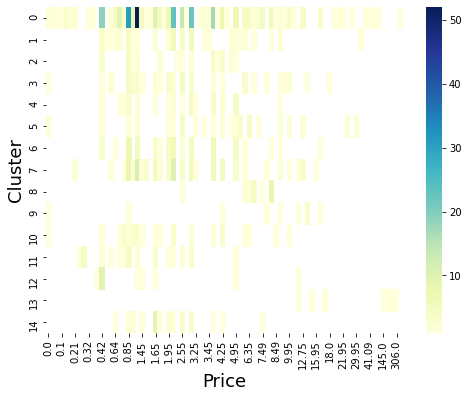

In [ ]:
#Plot a heatmap showing how the corresponding prices are clustered
df_germ['cluster'] = kmeans.labels_
clusters = df_germ.groupby(['Price','cluster']).size()
fig, ax1 = plt.subplots(figsize = (8, 6))

sns.heatmap(clusters.unstack(level = 'Price'), ax = ax1, cmap = 'YlGnBu')
ax1.set_xlabel('Price').set_size(18)
ax1.set_ylabel('Cluster').set_size(18)


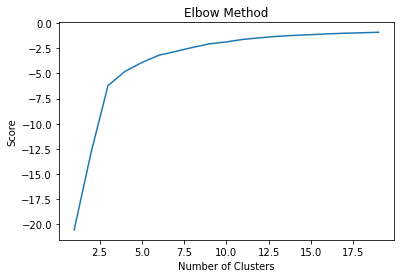

In [ ]:
#Use the Elbow Method to roughly determine the number of cluster

from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_norm = normalize(vec_text)
tf_idf_array = tf_idf_norm.toarray()

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
number_clusters = range(1, 20)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [ ]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 3, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200) #I set the number of clusters to 10 at first
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pink, christma, blue, box, vintag, heart, green, cake, small, mug
1 : red, spot, retrospot, retro, white, spotti, heart, tube, candi, doormat
2 : set, light, vintag, jet, bag, airlin, stationeri, paper, imag, wooden


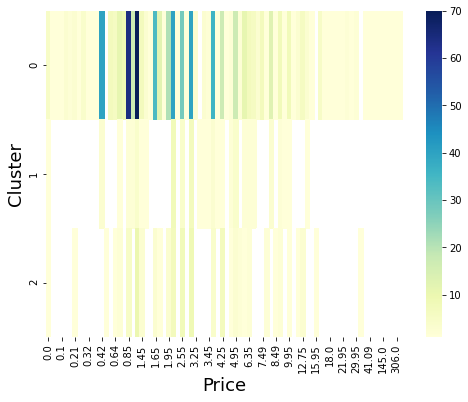

In [ ]:
#Plot the new fig of after clustering
df_germ['cluster'] = kmeans.labels_
clusters = df_germ.groupby(['Price','cluster']).size()
fig, ax1 = plt.subplots(figsize = (8, 6))

sns.heatmap(clusters.unstack(level = 'Price'), ax = ax1, cmap = 'YlGnBu')
ax1.set_xlabel('Price').set_size(18)
ax1.set_ylabel('Cluster').set_size(18)

The above heatmap shows the relationship between the price and the clusters, using the optimal clustering method generated by the Elbow method. The average price of the three clusters do not have large differences. However, the variances of the price in the three clusters have obvious difference. Cluster 0 has the largest variance, while the cluster 2 and cluster 1 have smaller variances, in a descending order.

#Question 2

Given a list of integer intervals defined by (start, end), where start is inclusive and end is exclusive, write a function that returns the sum of the integers in the union of all the intervals.

In [ ]:
#I referred to LeetCode No. 56 https://leetcode.com/problems/merge-intervals/
"""
Define an interval:

class Interval(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
"""

class Solution:
    """
    @param intervals: interval list.
    @return: sum of new interval list.
    """
    def forge(self, intervals):
        if len(intervals) < 2: 
          num_list = range(start, end) 
          final_sum = sum(num_list) 
          return final_sum   #return the sum of the interval itself if there is only 1 or 0 interval
        intervals = sorted(intervals, key=lambda x: x.start)  #sort intervals (x) by their starting values
        res = [intervals[0]]
        i = 1
        k = 0
        while i < len(intervals):
            if res[k].end >= intervals[i].start: 
                res[k] = Interval(res[k].start, res[k].end if res[k].end >= intervals[i].end else intervals[i].end) 
                for j in res:
                  final_sum += sum(range(j.start, j.end))  #sum the sum of integers in each interval        
            else:
                res.append(intervals[i])
                k += 1
            i += 1     #iterate until the last original interval
        return final_sum